In [1]:
! kaggle datasets download -d yaminh/bank-marketing-campaign-dataset -p "D:\CLASSIFICATION_ALGO"

Dataset URL: https://www.kaggle.com/datasets/yaminh/bank-marketing-campaign-dataset
License(s): apache-2.0




  0%|          | 0.00/447k [00:00<?, ?B/s]
100%|██████████| 447k/447k [00:00<00:00, 387MB/s]


In [2]:
from zipfile import ZipFile

path = "bank-marketing-campaign-dataset.zip"

with ZipFile(path, 'r') as ex :
    
    ex.extractall()
    
    print("The Dataset Folder Extracted")
    

The Dataset Folder Extracted


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
banking_data = pd.read_csv('dataset.csv')

In [5]:
banking_data.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


In [6]:
banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   occupation                 45211 non-null  object
 1   age                        45211 non-null  int64 
 2   education_level            45211 non-null  object
 3   marital_status             45211 non-null  object
 4   communication_channel      45211 non-null  object
 5   call_month                 45211 non-null  object
 6   call_day                   45211 non-null  int64 
 7   call_duration              45211 non-null  int64 
 8   call_frequency             45211 non-null  int64 
 9   previous_campaign_outcome  45211 non-null  object
 10  conversion_status          45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [7]:
banking_data.isnull().sum()

occupation                   0
age                          0
education_level              0
marital_status               0
communication_channel        0
call_month                   0
call_day                     0
call_duration                0
call_frequency               0
previous_campaign_outcome    0
conversion_status            0
dtype: int64

<Axes: >

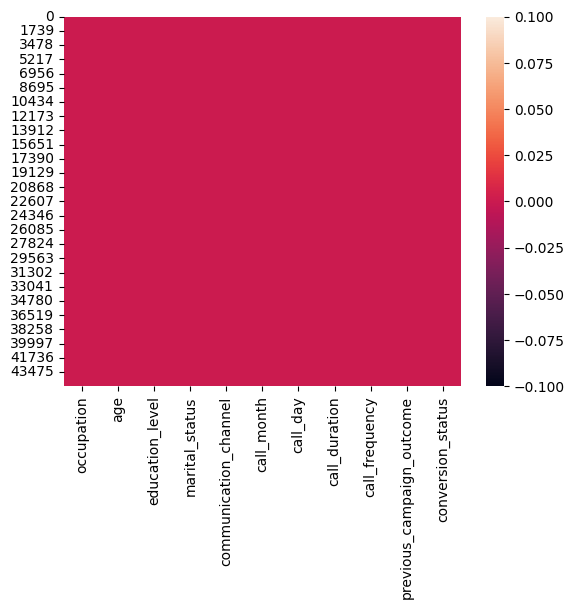

In [8]:
sns.heatmap(banking_data.isnull())

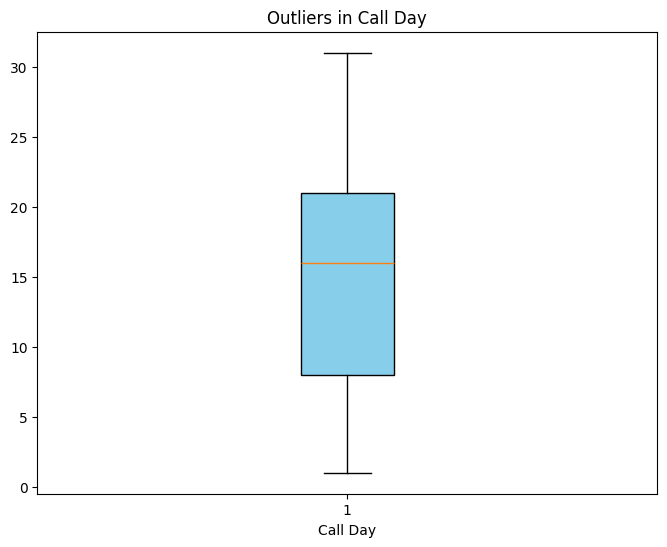

In [9]:
plt.figure(figsize = (8, 6))
plt.boxplot(banking_data['call_day'], patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title("Outliers in Call Day")
plt.xlabel("Call Day")
plt.show()

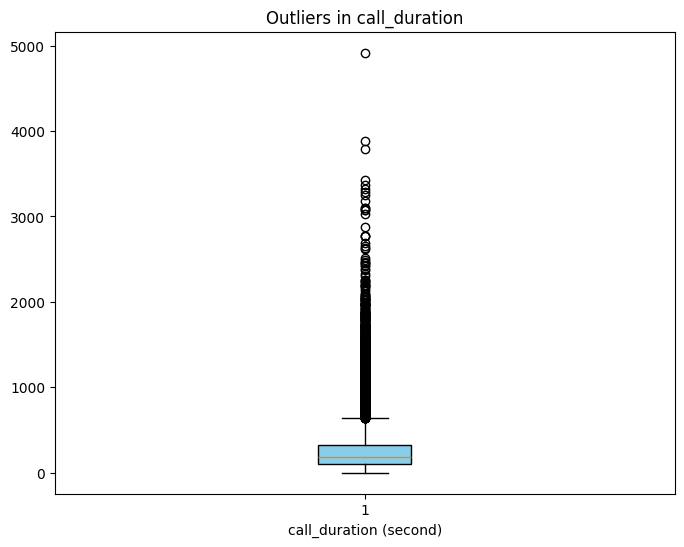

In [10]:
plt.figure(figsize = (8, 6))
plt.boxplot(banking_data['call_duration'], patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title("Outliers in call_duration")
plt.xlabel("call_duration (second)")
plt.show()

<Figure size 800x600 with 0 Axes>

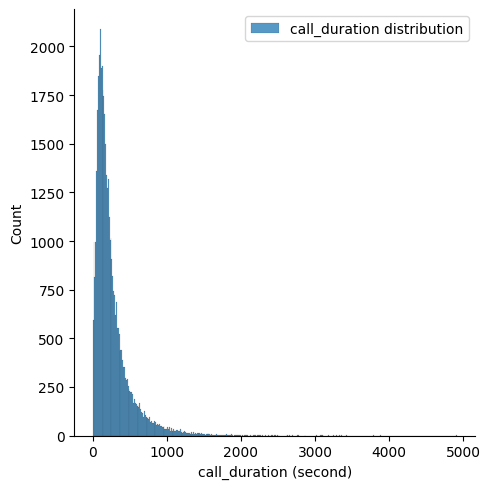

In [11]:
plt.figure(figsize = (8, 6))
sns.displot(banking_data['call_duration'], label = 'call_duration distribution')
plt.xlabel("call_duration (second)")
plt.legend()
plt.show()

In [12]:
banking_data.dtypes

occupation                   object
age                           int64
education_level              object
marital_status               object
communication_channel        object
call_month                   object
call_day                      int64
call_duration                 int64
call_frequency                int64
previous_campaign_outcome    object
conversion_status            object
dtype: object

<Figure size 800x600 with 0 Axes>

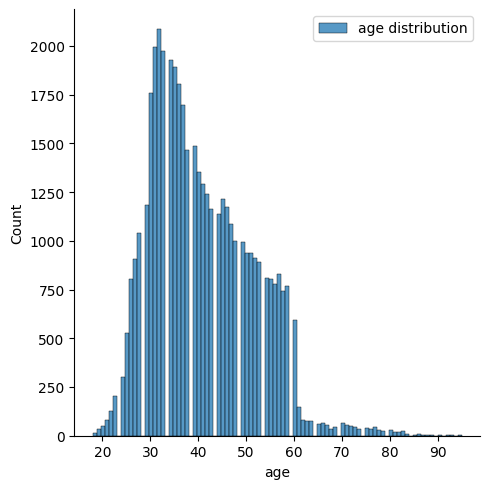

In [13]:
plt.figure(figsize = (8, 6))
sns.displot(banking_data['age'], label = 'age distribution')
plt.xlabel("age")
plt.legend()
plt.show()

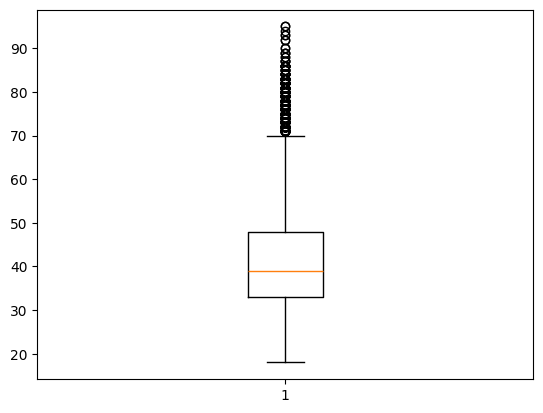

In [14]:
plt.boxplot(x=  banking_data['age'])
plt.show()

<Figure size 800x600 with 0 Axes>

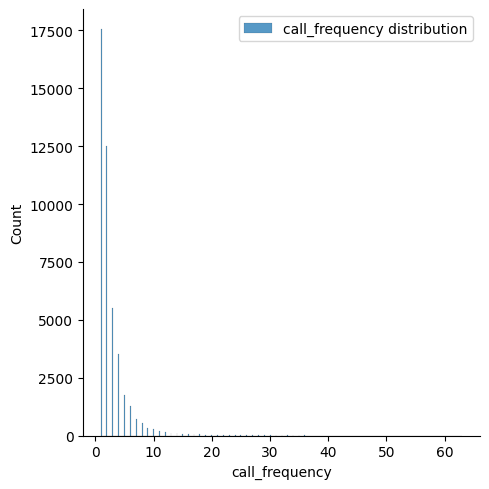

In [15]:
plt.figure(figsize = (8, 6))
sns.displot(banking_data['call_frequency'], label = 'call_frequency distribution')
plt.xlabel("call_frequency")
plt.legend()
plt.show()

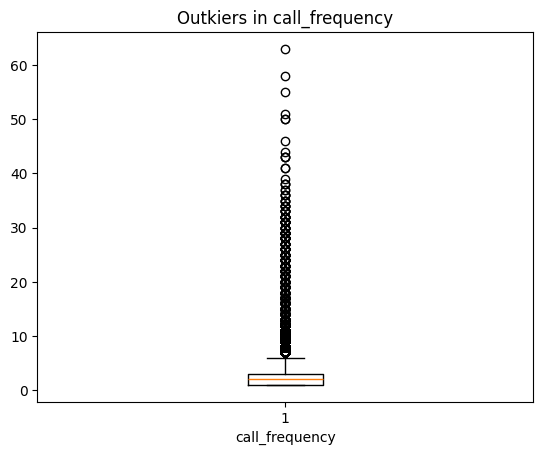

In [16]:
plt.boxplot(x = banking_data['call_frequency'])
plt.xlabel("call_frequency")
plt.title("Outkiers in call_frequency")
plt.show()

In [17]:
banking_data['communication_channel'].value_counts()

communication_channel
mobile          29285
unidentified    13020
landline         2906
Name: count, dtype: int64

In [18]:
label_encoder = LabelEncoder()

In [ ]:
# First Meehod ---- >
# banking_data['occupation'] = label_encoder.fit_transform(banking_data['occupation'])
# banking_data['education_level'] = label_encoder.fit_transform(banking_data['education_level'])
# banking_data['marital_status'] = label_encoder.fit_transform(banking_data['marital_status'])
# banking_data['communication_channel'] = label_encoder.fit_transform(banking_data['communication_channel'])
# banking_data['call_month'] = label_encoder.fit_transform(banking_data['call_month'])
# banking_data['previous_campaign_outcome'] = label_encoder.fit_transform(banking_data['previous_campaign_outcome'])


In [38]:
banking_data.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,0,28,2,1,2,11,9,1,1,1,not_converted
1,0,58,3,1,2,6,5,307,2,2,not_converted
2,5,40,2,0,1,3,4,113,1,2,not_converted
3,7,63,2,1,1,0,7,72,5,2,not_converted
4,1,43,0,1,0,5,29,184,4,2,not_converted


In [19]:
categoral_columns = ['occupation', 'education_level', 'marital_status', 'communication_channel', 'call_month', 'previous_campaign_outcome']

for x in categoral_columns :
    le = LabelEncoder()
    banking_data[x] = le.fit_transform(banking_data[x])

In [20]:
banking_data.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,0,28,2,1,2,11,9,1,1,1,not_converted
1,0,58,3,1,2,6,5,307,2,2,not_converted
2,5,40,2,0,1,3,4,113,1,2,not_converted
3,7,63,2,1,1,0,7,72,5,2,not_converted
4,1,43,0,1,0,5,29,184,4,2,not_converted


In [21]:
banking_data['conversion_status'].value_counts()

conversion_status
not_converted    39922
converted         5289
Name: count, dtype: int64

In [22]:
banking_data['conversion_status'] = np.where(banking_data['conversion_status'] =='not_converted',0, 1)

In [23]:
banking_data.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,0,28,2,1,2,11,9,1,1,1,0
1,0,58,3,1,2,6,5,307,2,2,0
2,5,40,2,0,1,3,4,113,1,2,0
3,7,63,2,1,1,0,7,72,5,2,0
4,1,43,0,1,0,5,29,184,4,2,0


In [24]:
x = banking_data.drop(columns = 'conversion_status')
y = banking_data['conversion_status']

In [25]:
scaler = StandardScaler()

In [26]:
x_scaled = scaler.fit_transform(x)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2,stratify = y, random_state = 2)

In [28]:
model = LogisticRegression()

In [29]:
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
y_predict = model.predict(x_test)

In [31]:
y_predict

array([0, 0, 0, ..., 0, 1, 0], shape=(9043,))

In [32]:
y_test

44023    1
10758    0
32269    0
24331    0
3435     1
        ..
9966     0
31213    0
35129    0
33031    1
7459     0
Name: conversion_status, Length: 9043, dtype: int64

In [33]:
print(f'Accurecy Score : {accuracy_score(y_test, y_predict)}')

Accurecy Score : 0.8891960632533451


In [34]:


print(f"{classification_report(y_test, y_predict)}")

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7985
           1       0.58      0.19      0.29      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.61      9043
weighted avg       0.86      0.89      0.86      9043



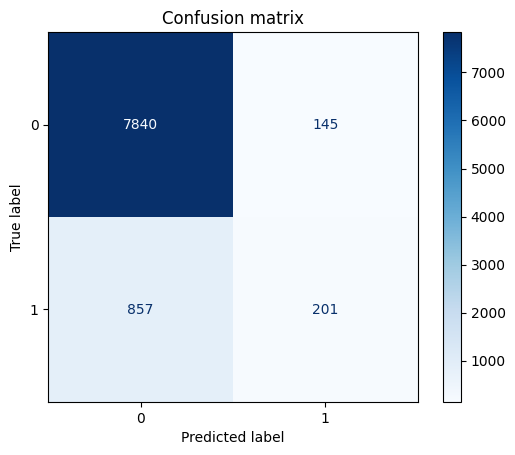

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = 'Blues')
plt.title("Confusion matrix")
plt.show()